In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("energy.csv")

In [3]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
dataset.isnull().sum().sum()

0

In [6]:
seq_len = 128
num_sensors = 26

In [7]:
dataset.drop(columns=["date", "Appliances", "lights"], inplace=True)

In [8]:
dataset.shape

(19735, 26)

In [9]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
dataset = std.fit_transform(dataset)

In [ ]:
slicing_window_step = 1

In [10]:
import numpy as np
tss = []
for i in range(0, dataset.shape[0]-seq_len, slicing_window_step):
    ts = dataset[i:i+seq_len, 1].swapaxes(0, 1)
    tss.append(ts)
tss = np.stack(tss)

In [11]:
tss.shape

(19607, 26, 128)

In [12]:
np.save("energy.npy", tss)

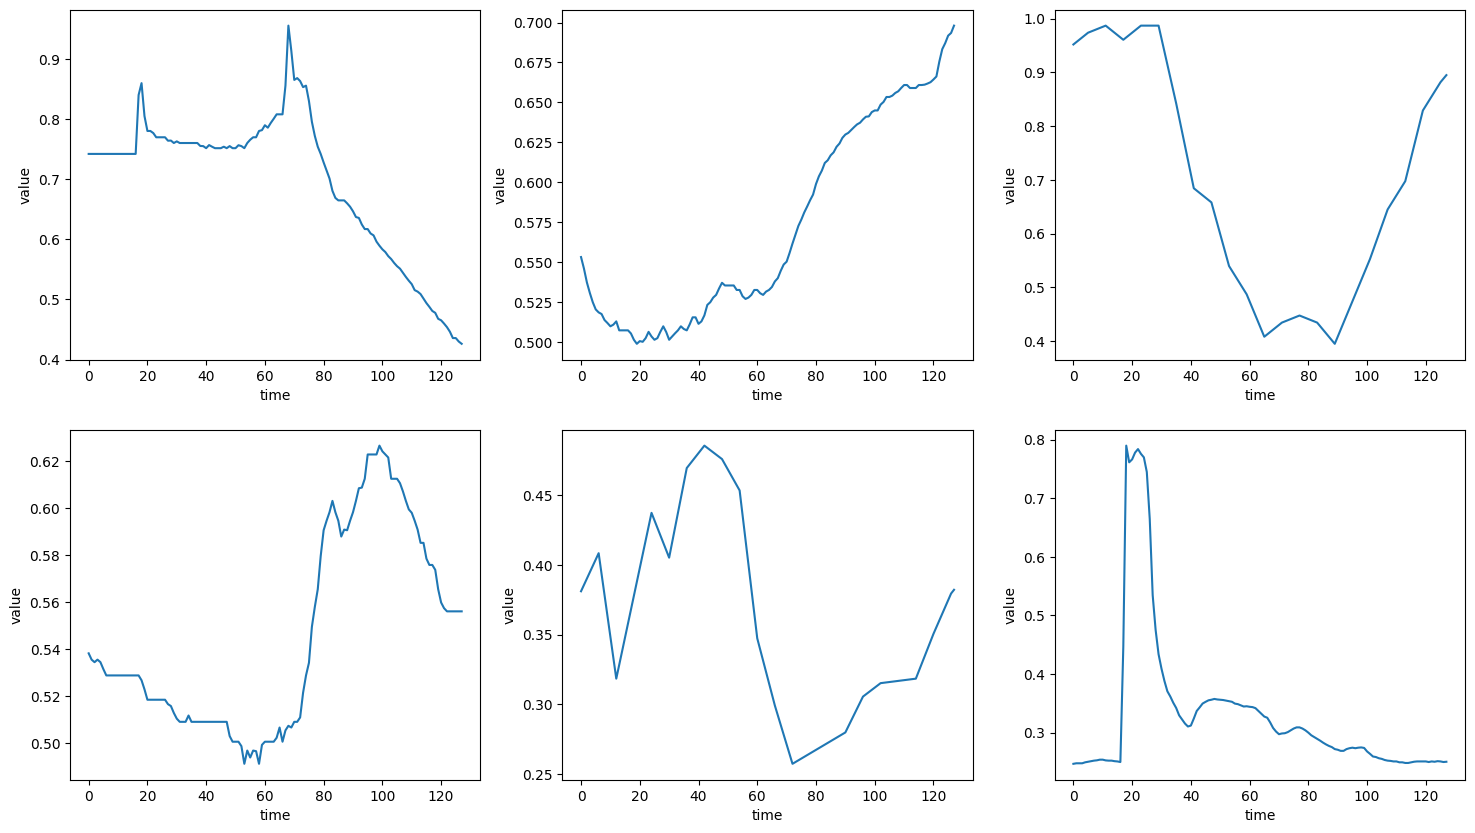

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
test = np.load("./energy.npy")
plt.figure(figsize = (18,10))
for count in range(1, 7):
    plt.subplot(2, 3, count)
    sample = random.randint(0, test.shape[0]-1)
    sensor = random.randint(0, test.shape[1]-1)
    plt.plot(test[sample, sensor, :])
    plt.xlabel('time')
    plt.ylabel('value')
plt.show()

In [14]:
test.shape

(19607, 26, 128)